In [1]:
import numpy as np
import arepo
import h5py as h5
import matplotlib.pyplot as plt
import matplotlib as mpl

import sys
sys.path.append('../../note/')
import galaxy

from vortrace import vortrace as vt
import vortrace
import importlib

In [2]:
importlib.reload(vortrace)

<module 'vortrace' from '/n/home01/abeane/vortrace/vortrace/__init__.py'>

In [6]:
extent = [[0, 1], [0, 1]]
grid = vortrace.grid.generate_projection_grid(extent, 2, [0, 10], np.array([0.5, 0.5, 3.5]), proj='xz')

grid_start = [[[0.25 0.25 0.  ]
  [0.25 0.75 0.  ]]

 [[0.75 0.25 0.  ]
  [0.75 0.75 0.  ]]]
fixing handedness of bounds
grid_start = [[[ 0.25  0.25 10.  ]
  [ 0.25  0.75 10.  ]]

 [[ 0.75  0.25 10.  ]
  [ 0.75  0.75 10.  ]]]
grid_start before center subtract [[[ 0.25  0.25 10.  ]
  [ 0.25  0.75 10.  ]]

 [[ 0.75  0.25 10.  ]
  [ 0.75  0.75 10.  ]]]
grid_start before rot [[[-0.25 -0.25  6.5 ]
  [-0.25  0.25  6.5 ]]

 [[ 0.25 -0.25  6.5 ]
  [ 0.25  0.25  6.5 ]]]
grid_start after rot [[[-0.25 -6.5  -0.25]
  [-0.25 -6.5   0.25]]

 [[ 0.25 -6.5  -0.25]
  [ 0.25 -6.5   0.25]]]
grid_start after center addition [[[ 0.25 -6.    3.25]
  [ 0.25 -6.    3.75]]

 [[ 0.75 -6.    3.25]
  [ 0.75 -6.    3.75]]]
101


In [7]:
print(grid)

(array([[[ 0.25, -6.  ,  3.25],
        [ 0.25, -6.  ,  3.75]],

       [[ 0.75, -6.  ,  3.25],
        [ 0.75, -6.  ,  3.75]]]), array([[[0.25, 4.  , 3.25],
        [0.25, 4.  , 3.75]],

       [[0.75, 4.  , 3.25],
        [0.75, 4.  , 3.75]]]))


In [18]:
basepath = '/n/holylfs05/LABS/hernquist_lab/Users/abeane/GSEgas/'

In [3]:
gal = galaxy.Galaxy(basepath + 'runs/MW7_GSE4/lvl5-denscut/output', 240, orient=True)

In [9]:
BoxSize = gal.sn.BoxSize

pos = gal.sn.part0.pos.value
rho = gal.sn.part0.rho.value
rho *= gal.sn.part0.GFM_Metallicity

COM = gal.sub.SubhaloPos[0]

rng = [[-100, 100], [-100, 100]]
nres = 256

pc = vt.ProjectionCloud(pos, rho, boundbox=[0., BoxSize, 0., BoxSize, 0., BoxSize])

extent_xy = [[COM[0] + rng[0][0], COM[0] + rng[0][1]], [COM[1] + rng[1][0], COM[1] + rng[1][1]]]
extent_xz = [[COM[0] + rng[0][0], COM[0] + rng[0][1]], [COM[2] + rng[1][0], COM[2] + rng[1][1]]]

bounds = [0., BoxSize]

dat_xy = pc.projection(extent_xy, nres, bounds, COM, proj='xy')
dat_xz = pc.projection(extent_xz, nres, bounds, COM, proj='xz')

Applying bounding box...
npart: 153991
Snapshot loaded.
Building tree...
Tree build took 27 milliseconds.
Making projection...
Projection generation took 7310 milliseconds.
Making projection...
Projection generation took 4559 milliseconds.


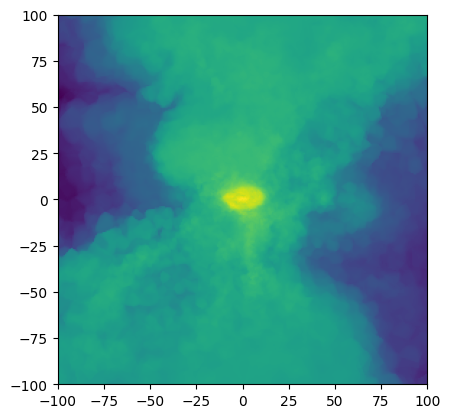

In [16]:
fig, ax = plt.subplots(1, 1)

extent = [rng[0][0], rng[0][1], rng[1][0], rng[1][1]]
ax.imshow(dat_xy.T, origin='lower', extent=extent, norm=mpl.colors.LogNorm())